## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [3]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "age_filtered_bigger_7"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


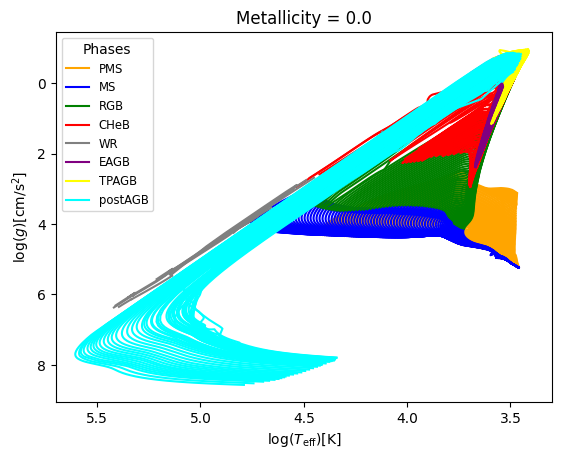

In [4]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [5]:
print_uniques("log10_isochrone_age_yr", iso_df)
print_uniques_count("log10_isochrone_age_yr", iso_df)

log10_isochrone_age_yr : 107 unique values, range [5.0, 10.3]
log10_isochrone_age_yr : 
	5.0 => 3736
	5.05 => 3761
	5.1 => 3784
	5.15 => 3807
	5.2 => 3831
	5.25 => 3852
	5.3 => 3866
	5.35 => 3889
	5.4 => 3904
	5.45 => 3924
	5.5 => 3942
	5.55 => 3959
	5.6 => 3978
	5.65 => 3994
	5.7 => 4011
	5.75 => 4032
	5.8 => 4050
	5.8500000000000005 => 4068
	5.9 => 4083
	5.95 => 4104
	6.0 => 4121
	6.050000000000001 => 4141
	6.1000000000000005 => 4168
	6.15 => 4211
	6.2 => 4295
	6.25 => 4448
	6.300000000000001 => 4699
	6.3500000000000005 => 6427
	6.4 => 7787
	6.45 => 9266
	6.5 => 10509
	6.550000000000001 => 10643
	6.6000000000000005 => 10420
	6.65 => 10288
	6.7 => 10498
	6.75 => 10638
	6.800000000000001 => 10604
	6.8500000000000005 => 10571
	6.9 => 10539
	6.95 => 10503
	7.0 => 10470
	7.050000000000001 => 10433
	7.1000000000000005 => 10397
	7.15 => 10363
	7.200000000000001 => 10327
	7.25 => 10289
	7.300000000000001 => 10245
	7.35 => 9914
	7.4 => 9784
	7.450000000000001 => 9992
	7.5 => 10133
	7.55000000

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


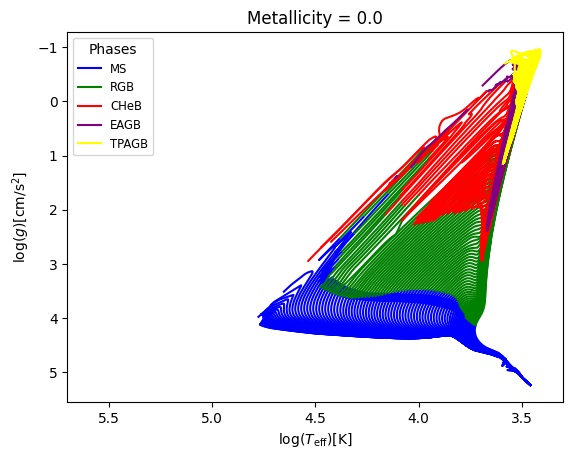

In [6]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [7]:
print_uniques("log10_isochrone_age_yr", phase_filtered_iso_df)
print_uniques_count("log10_isochrone_age_yr", phase_filtered_iso_df)

log10_isochrone_age_yr : 107 unique values, range [5.0, 10.3]
log10_isochrone_age_yr : 
	5.0 => 1093
	5.05 => 1137
	5.1 => 1180
	5.15 => 1227
	5.2 => 1270
	5.25 => 1316
	5.3 => 1358
	5.35 => 1407
	5.4 => 1449
	5.45 => 1498
	5.5 => 1546
	5.55 => 1595
	5.6 => 1644
	5.65 => 1692
	5.7 => 1738
	5.75 => 1790
	5.8 => 1838
	5.8500000000000005 => 1888
	5.9 => 1937
	5.95 => 1989
	6.0 => 2040
	6.050000000000001 => 2098
	6.1000000000000005 => 2158
	6.15 => 2228
	6.2 => 2334
	6.25 => 2500
	6.300000000000001 => 2763
	6.3500000000000005 => 4479
	6.4 => 4905
	6.45 => 5921
	6.5 => 7373
	6.550000000000001 => 7782
	6.6000000000000005 => 7643
	6.65 => 8097
	6.7 => 8892
	6.75 => 9072
	6.800000000000001 => 9072
	6.8500000000000005 => 9072
	6.9 => 9072
	6.95 => 9071
	7.0 => 9071
	7.050000000000001 => 9070
	7.1000000000000005 => 9070
	7.15 => 9070
	7.200000000000001 => 9069
	7.25 => 9064
	7.300000000000001 => 9055
	7.35 => 8758
	7.4 => 8661
	7.450000000000001 => 8901
	7.5 => 9073
	7.550000000000001 => 9068
	7

,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,7.05,3.950003,4.405570,0.0,-0.25,1.671333,0.127816
1,7.05,3.955106,4.412930,0.0,-0.25,1.695868,0.127302
2,7.05,3.960064,4.417538,0.0,-0.25,1.719484,0.128003
3,7.05,3.966442,4.421391,0.0,-0.25,1.749569,0.129832
4,7.05,3.971128,4.423741,0.0,-0.25,1.771402,0.131358
...,...,...,...,...,...,...,...
984504,10.30,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
984505,10.30,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
984506,10.30,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
984507,10.30,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


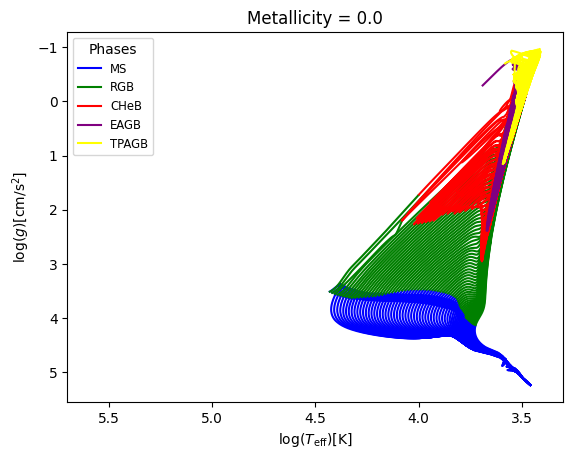

In [8]:
phase_age_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log10_isochrone_age_yr" : (">", 7)})
display(phase_age_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_age_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [9]:
print_all_uniques(phase_age_filtered_iso_df)

log10_isochrone_age_yr  : Range : 7.05 - 10.3, Mean : 8.79, Median : 8.8

log_Teff  : Range : 3.34 - 4.6126, Mean : 3.7364, Median : 3.6412

log_g  : Range : -1.14 - 5.4331, Mean : 1.8245, Median : 1.4334

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.1 - 22.912, Mean : 2.8084, Median : 1.7541

log_R  : Range : -1.0 - 3.046, Mean : 1.4436, Median : 1.6962



In [10]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_age_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 22.91204486899792
Median value in train data for the mass parameter: 1.7524696288353652
Mean value in train data for the mass parameter: 2.809260494769512
Range in train data for the radius parameter : -0.9974747647513328 - 3.045958826598921
Median value in train data for the radius parameter: 1.6967851563026433
Mean value in train data for the radius parameter: 1.444017827527877

Testing set statistics:
Range in test data for the mass parameter : 0.0999983928945104 - 22.881423527797157
Median value in test data for the mass parameter: 1.7590627349497372
Mean value in test data for the mass parameter: 2.8057927981416726
Range in test data for the radius parameter : -0.9963305599370684 - 3.0457050180898504
Median value in test data for the radius parameter: 1.69448700312772
Mean value in test data for the radius parameter: 1.4421744692745855

(738381, 4) (246128, 4)
(738381, 2) (246128, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.6535102471927607
RMSE :  1.771241837667407
MAE :  1.112218903305279
MedAE :  0.6294865935710492
CORR :  0.8083998065447489
MAX_ER :  15.464448543946407
Percentiles : 
  75th percentile :  1.4638733732687514
  90th percentile :  2.6341365649008606
  95th percentile :  3.592643258212627
  99th percentile :  7.020366056619977



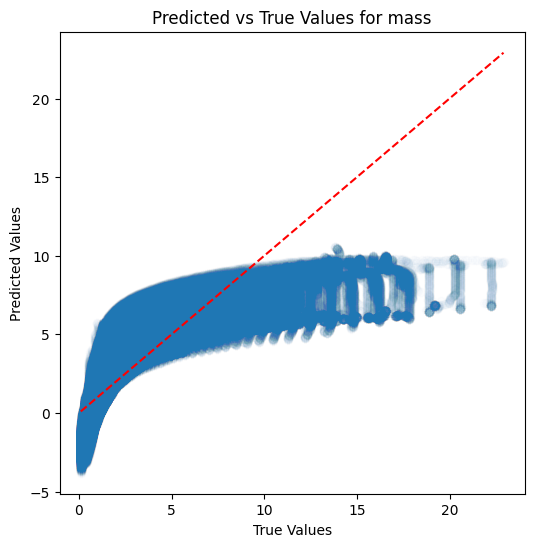

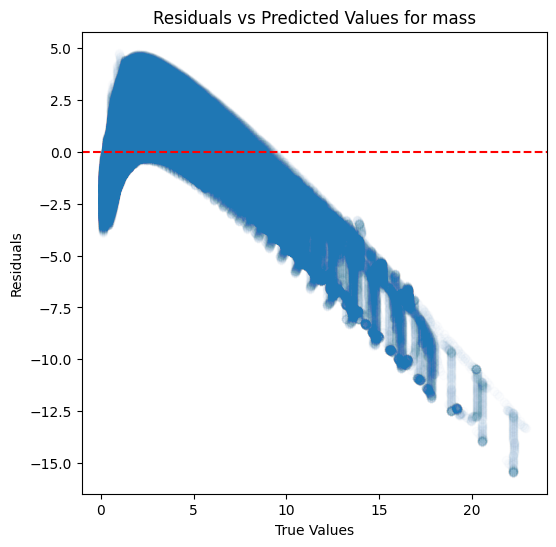

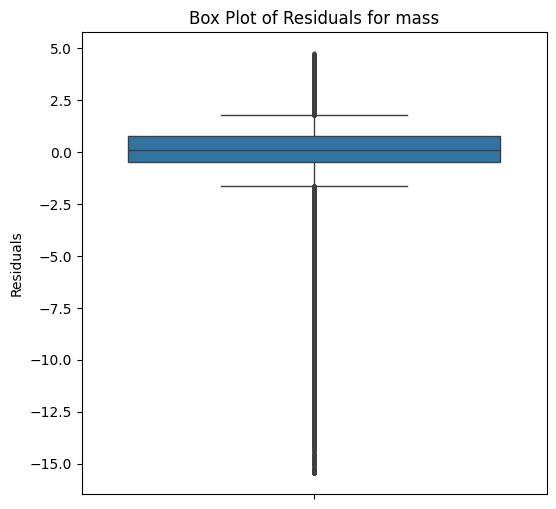

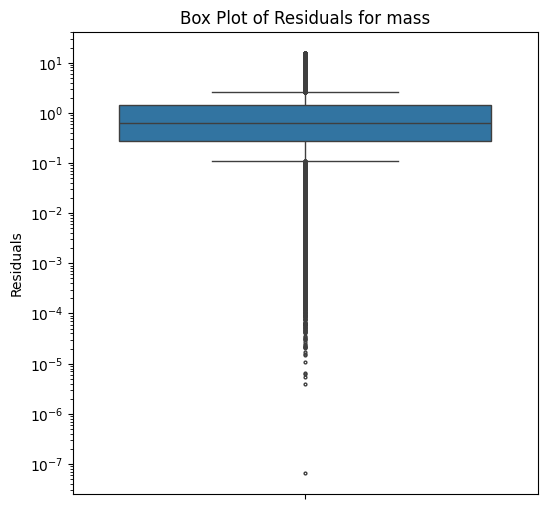

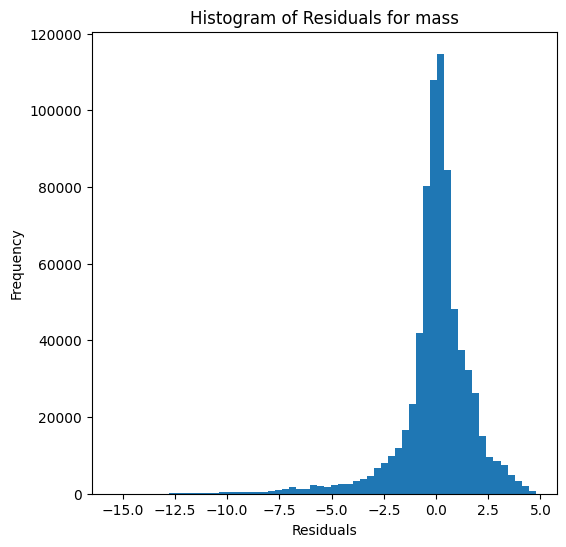

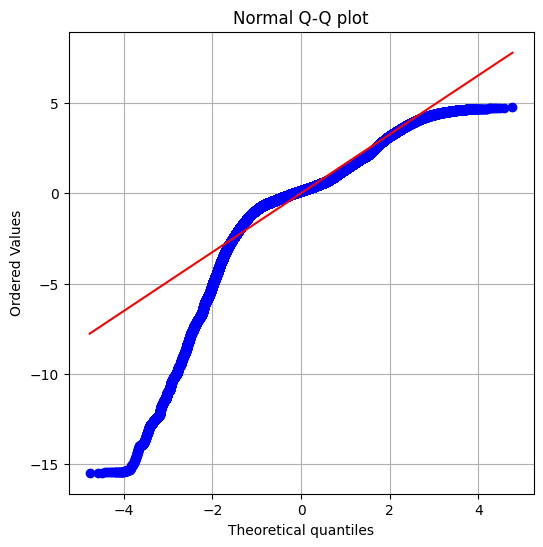


radius results:
RVE :  0.9941177619322793
RMSE :  0.07442759209965652
MAE :  0.05697369967925316
MedAE :  0.04449355481443362
CORR :  0.9970545431080297
MAX_ER :  0.3845077485601145
Percentiles : 
  75th percentile :  0.0802533151663245
  90th percentile :  0.1205771923764434
  95th percentile :  0.15108743648484196
  99th percentile :  0.22208564560271954



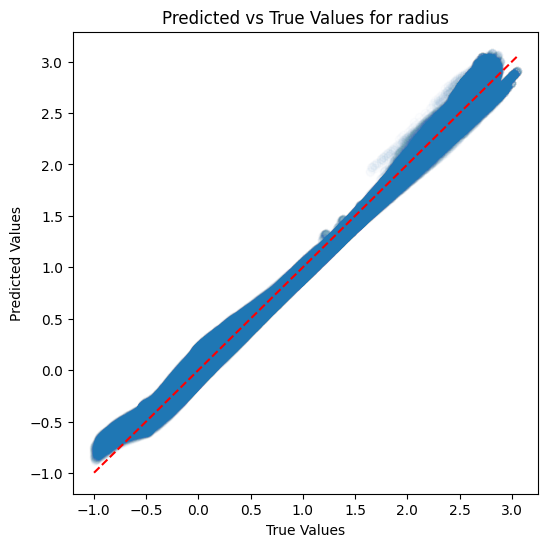

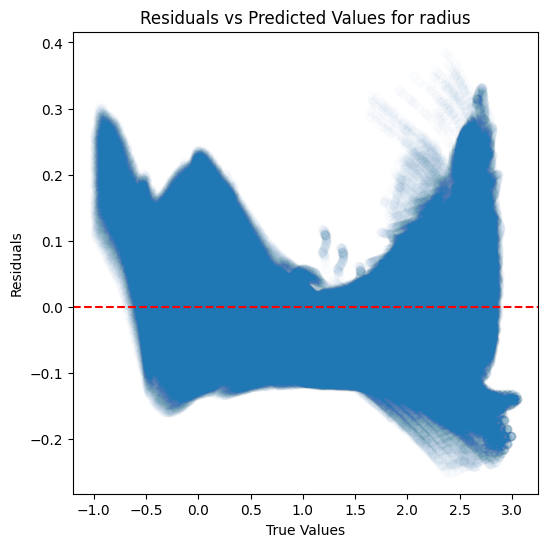

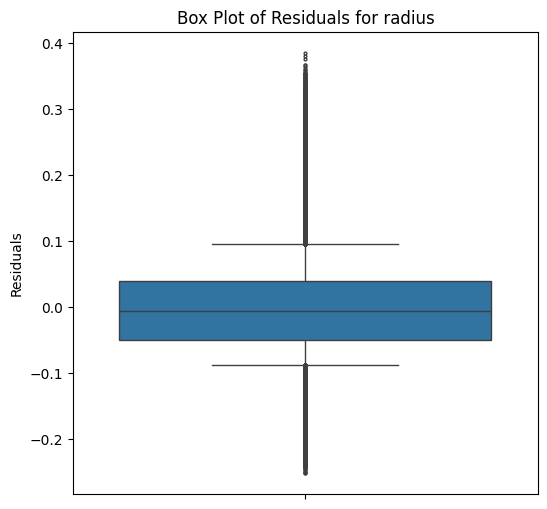

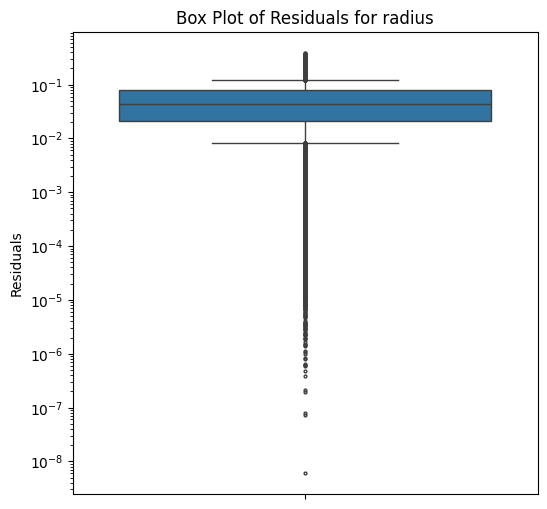

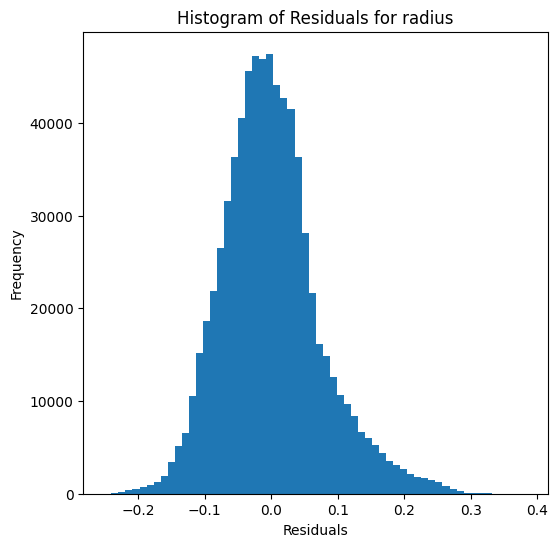

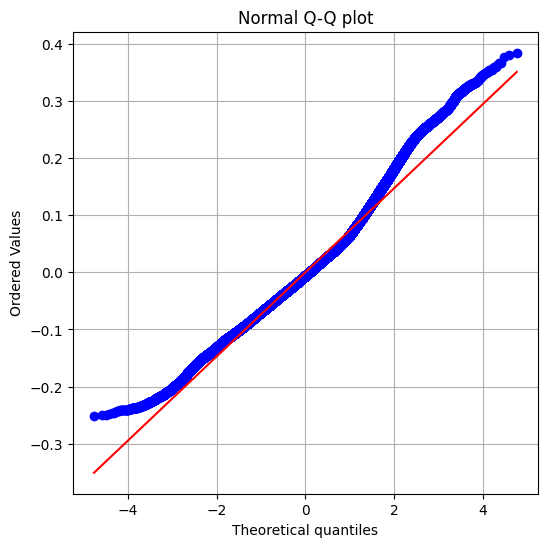

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.998835068792301
RMSE :  0.10270355679149645
MAE :  0.03418808637357143
MedAE :  0.004646923358745947
CORR :  0.9994175137821597
MAX_ER :  13.214636523970814
Percentiles : 
  75th percentile :  0.025502406217911666
  90th percentile :  0.0953329813590349
  95th percentile :  0.18007339345213857
  99th percentile :  0.3961494848417107



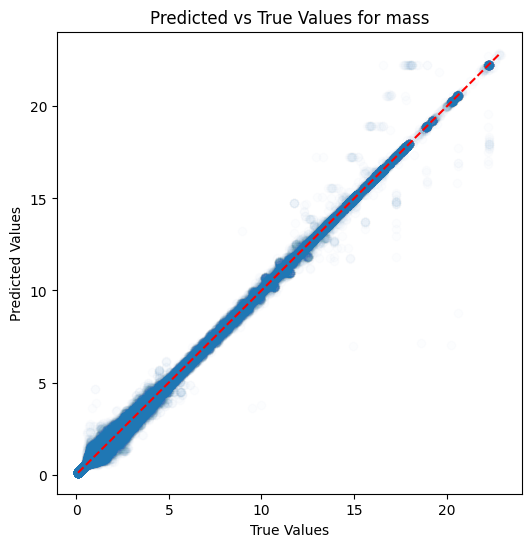

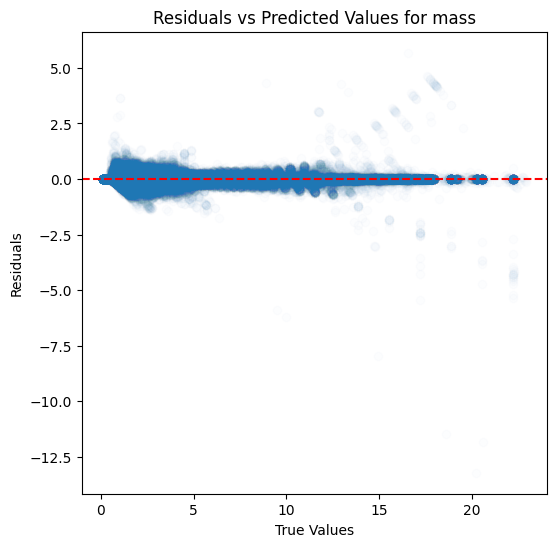

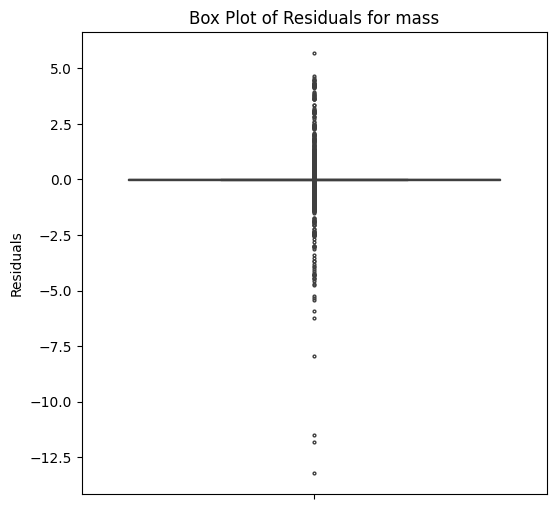

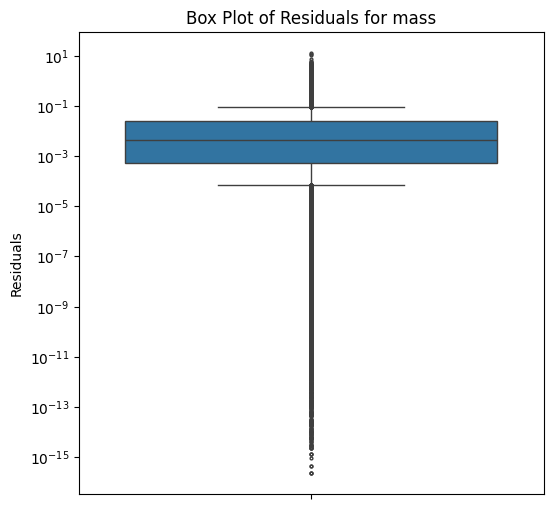

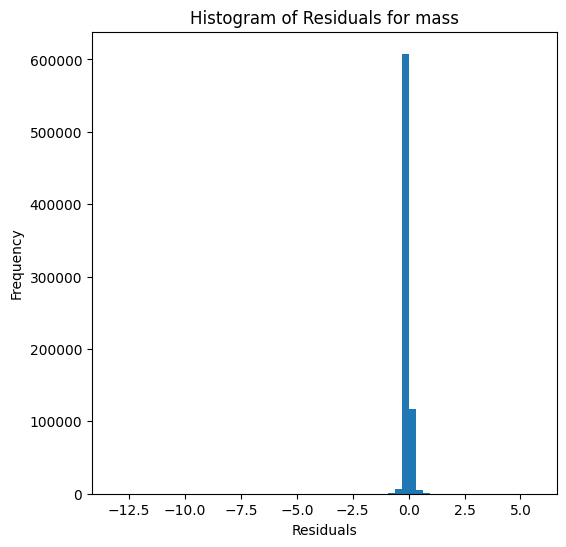

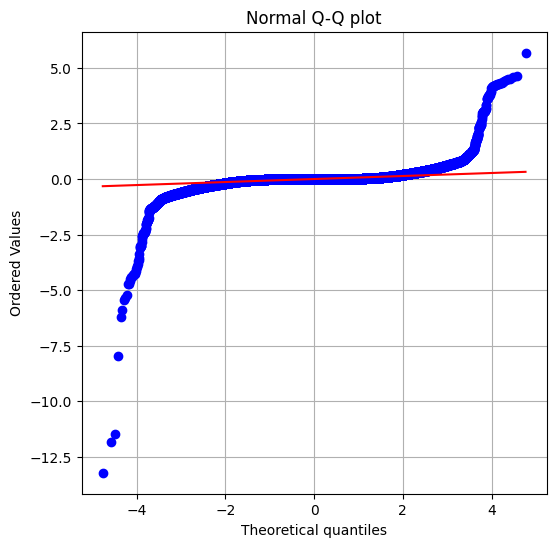


radius results:
RVE :  0.9997896846359009
RMSE :  0.014073915267354813
MAE :  0.007274634691226656
MedAE :  0.0035611289529771106
CORR :  0.9998948805243568
MAX_ER :  0.9910941768401202
Percentiles : 
  75th percentile :  0.00835339743839647
  90th percentile :  0.01667210530943311
  95th percentile :  0.02667433050623691
  99th percentile :  0.060789320452096535



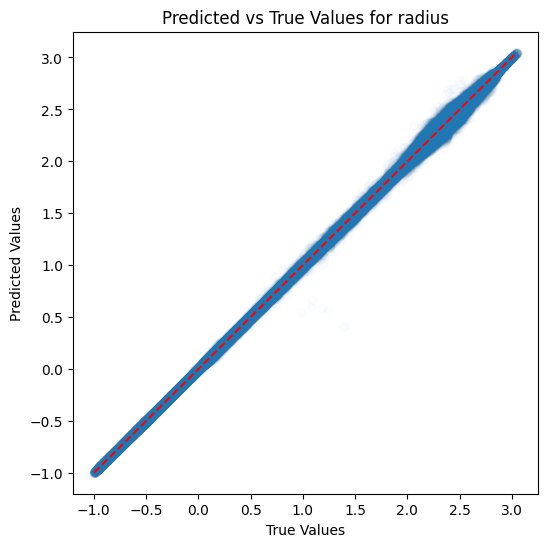

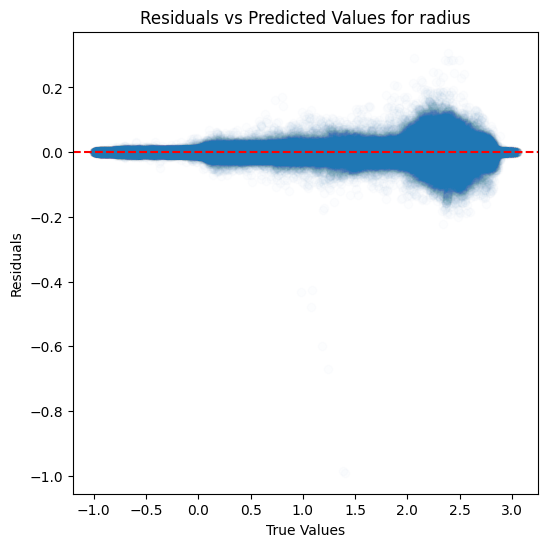

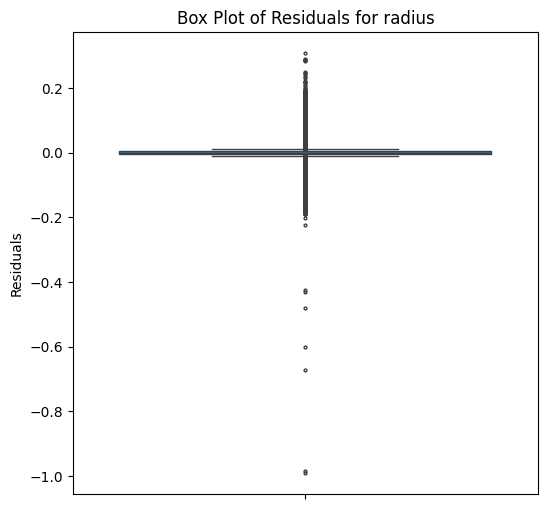

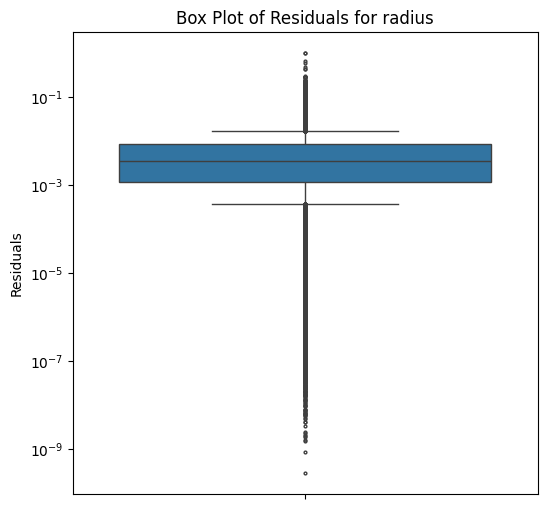

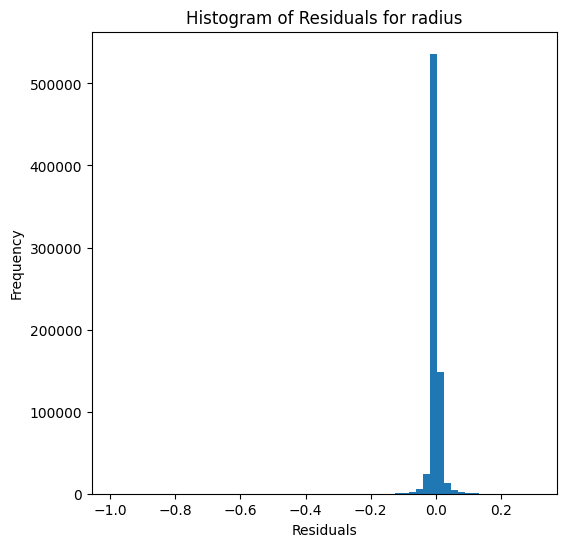

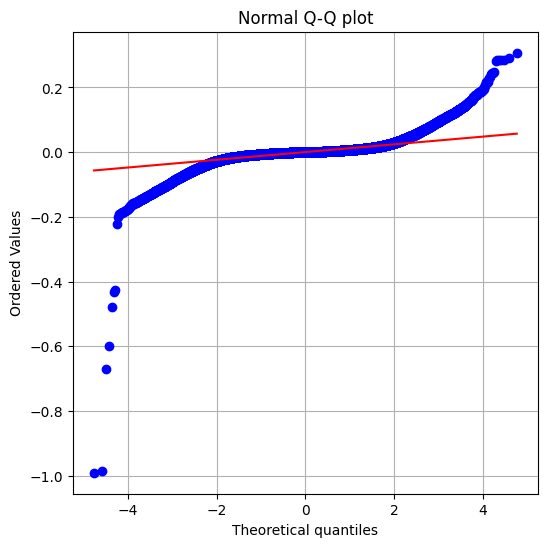

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9988667176770865
RMSE :  0.10129865508103979
MAE :  0.04625040553693943
MedAE :  0.01230376511089748
CORR :  0.9994336367479824
MAX_ER :  4.473437099224249
Percentiles : 
  75th percentile :  0.050529789049966745
  90th percentile :  0.13303937083441308
  95th percentile :  0.20610655494667185
  99th percentile :  0.3989272903564668



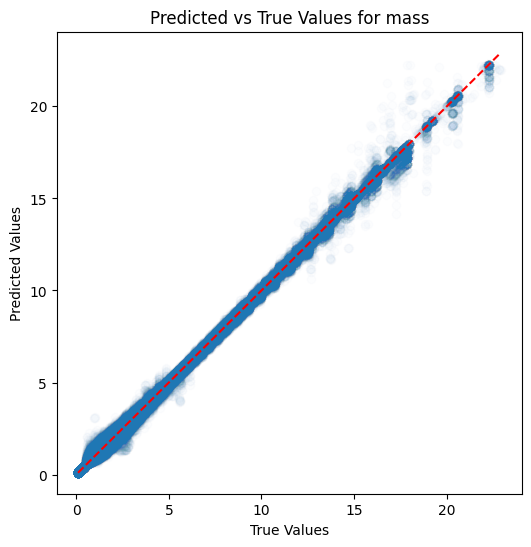

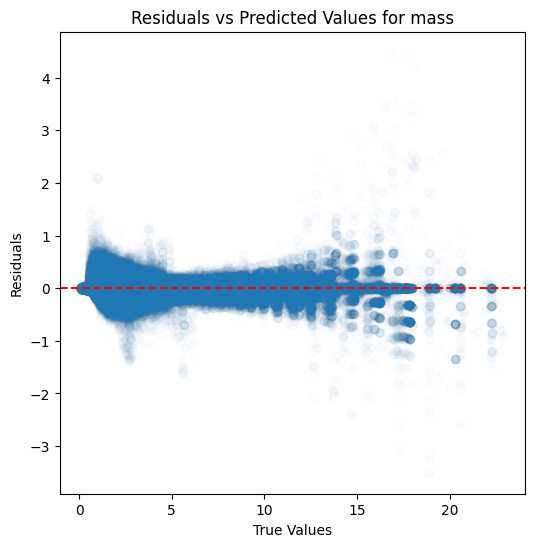

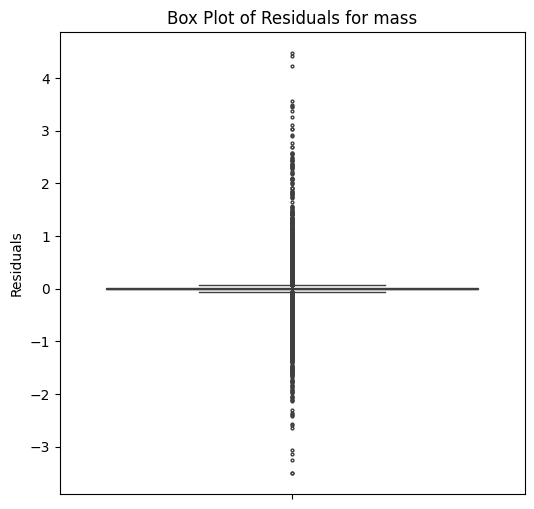

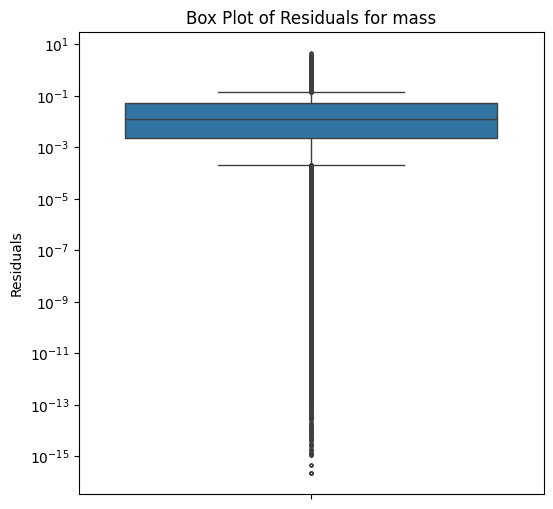

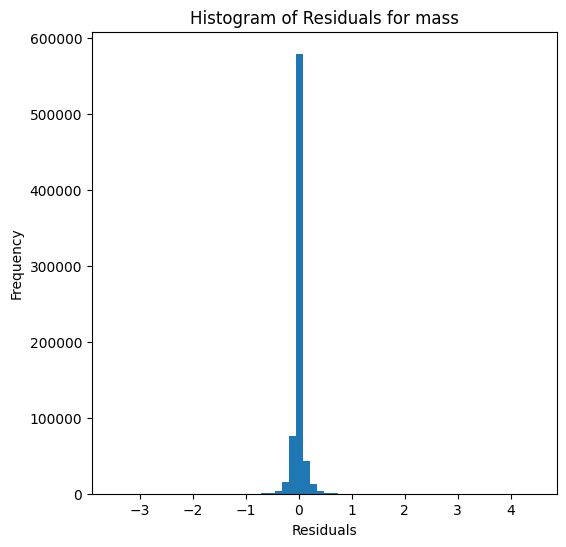

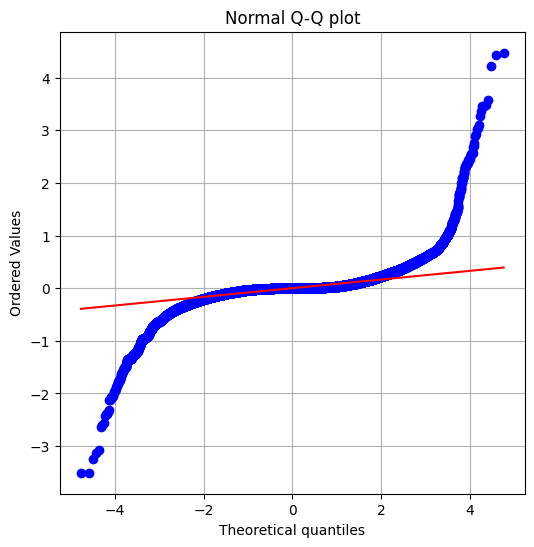


radius results:
RVE :  0.9998335910486641
RMSE :  0.01252002875668083
MAE :  0.006653543297981938
MedAE :  0.0031406058277652082
CORR :  0.9999168014909188
MAX_ER :  0.24134900482468868
Percentiles : 
  75th percentile :  0.007441130965403442
  90th percentile :  0.016131399210411512
  95th percentile :  0.025742832378216285
  99th percentile :  0.053879605325134944



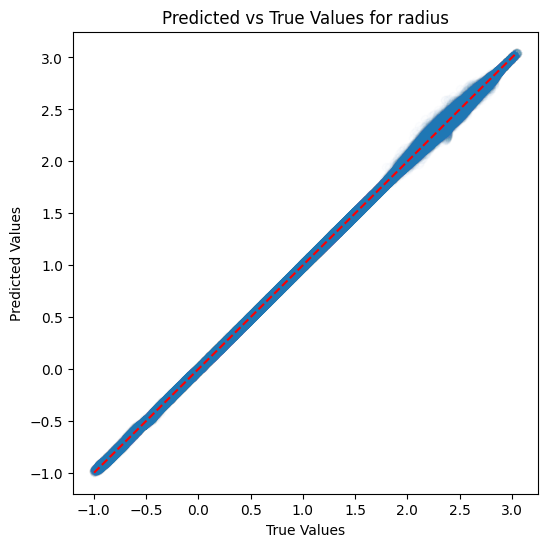

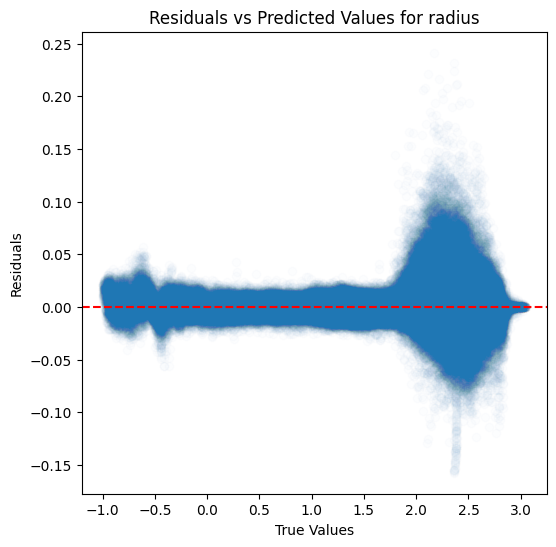

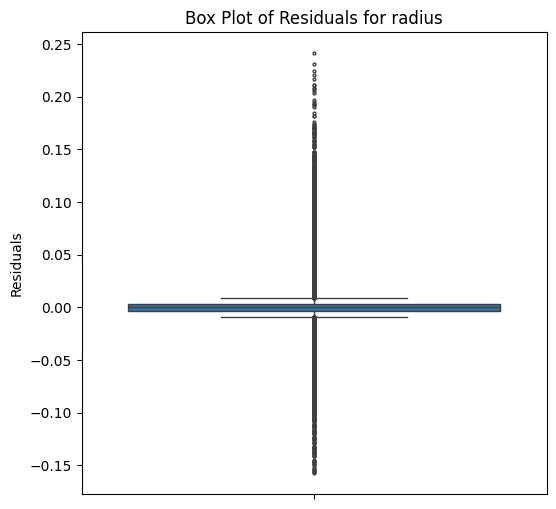

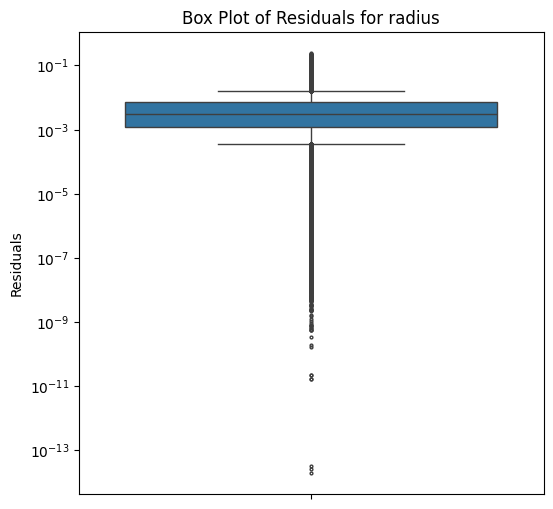

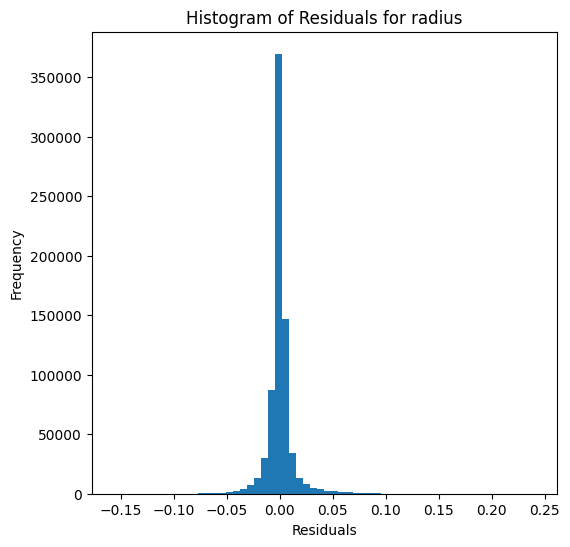

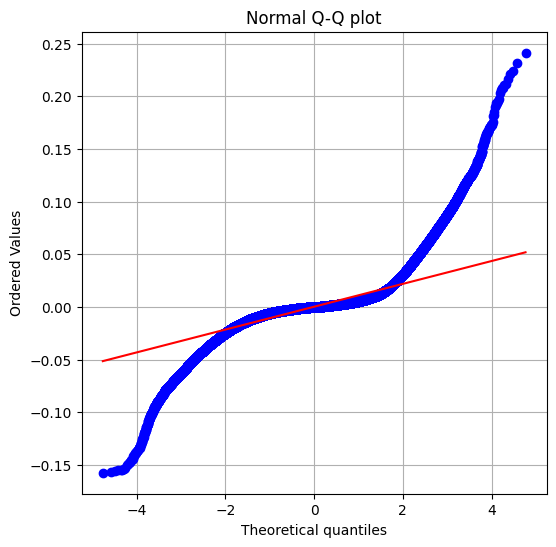

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9994094295676744
RMSE :  0.07312675830189554
MAE :  0.02969929239104219
MedAE :  0.007371712082929971
CORR :  0.9997046713988309
MAX_ER :  4.3407264411206015
Percentiles : 
  75th percentile :  0.028662203634708838
  90th percentile :  0.08264380355873846
  95th percentile :  0.13574479905575698
  99th percentile :  0.2860540518694598



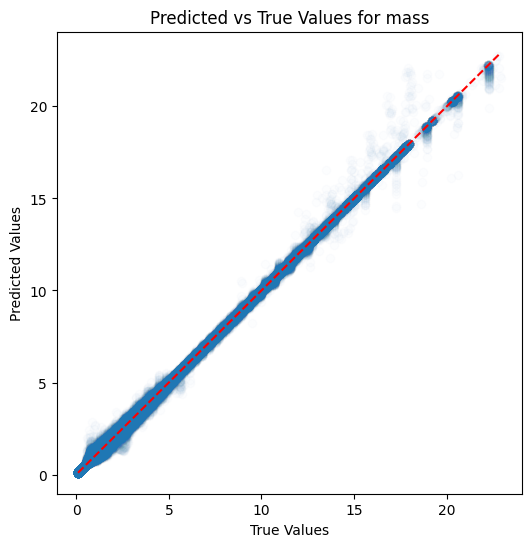

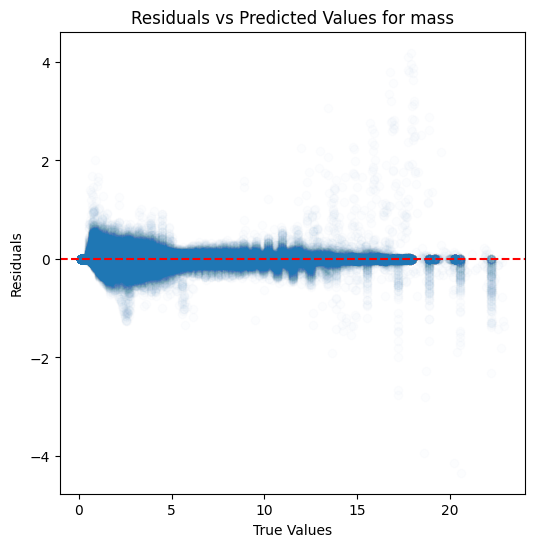

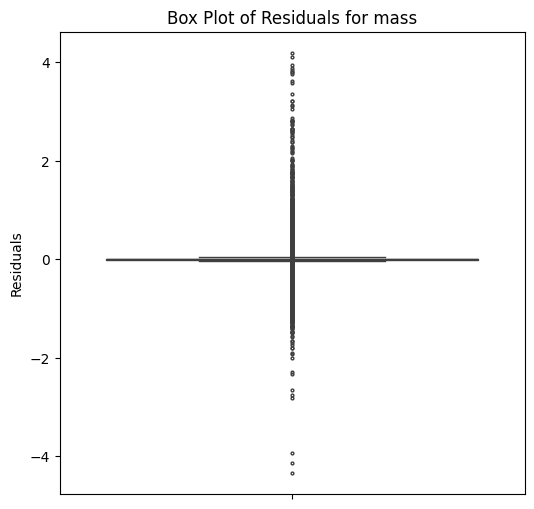

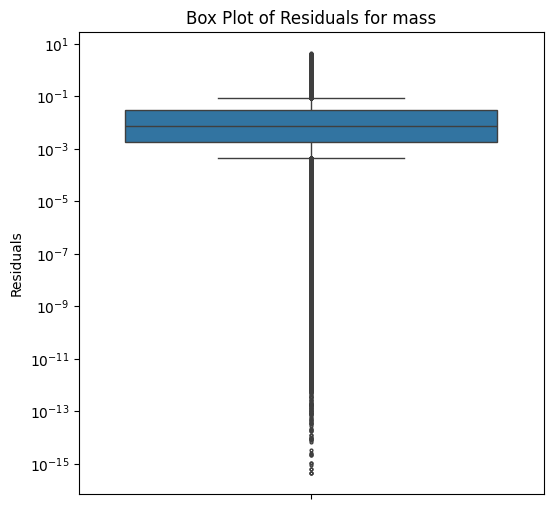

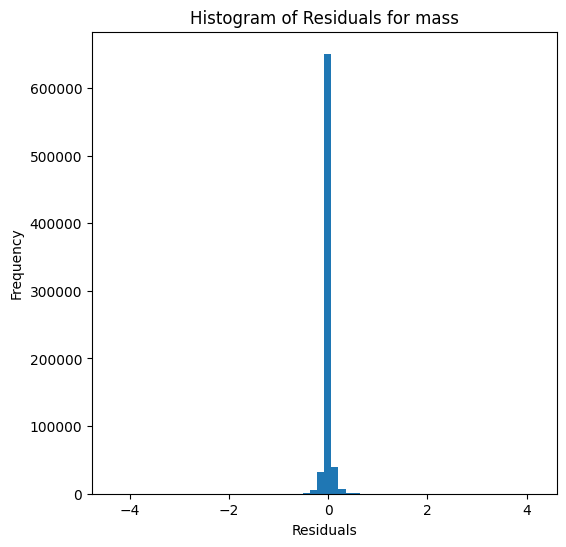

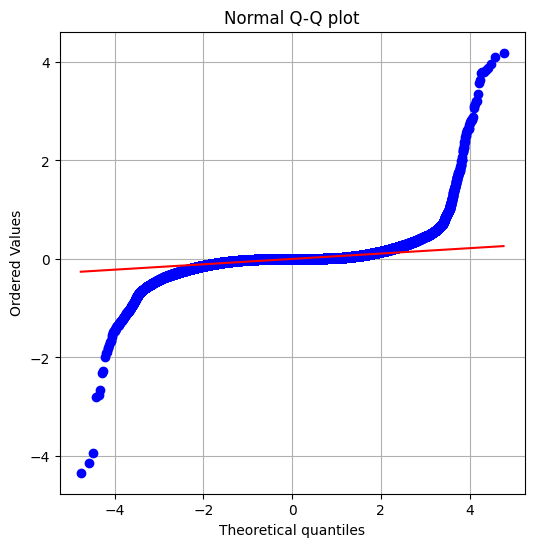


radius results:
RVE :  0.9999028279507524
RMSE :  0.009566802325371025
MAE :  0.004735271197032862
MedAE :  0.0019489672571275651
CORR :  0.9999514204192052
MAX_ER :  0.2420874494049845
Percentiles : 
  75th percentile :  0.005201049084885945
  90th percentile :  0.011736627958031765
  95th percentile :  0.018604430185944043
  99th percentile :  0.04142500301083086



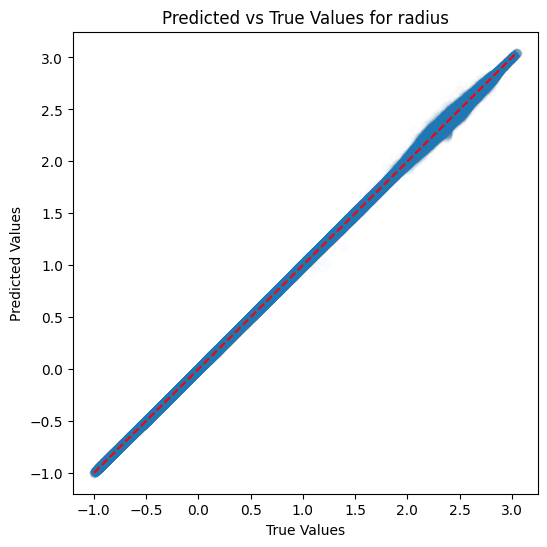

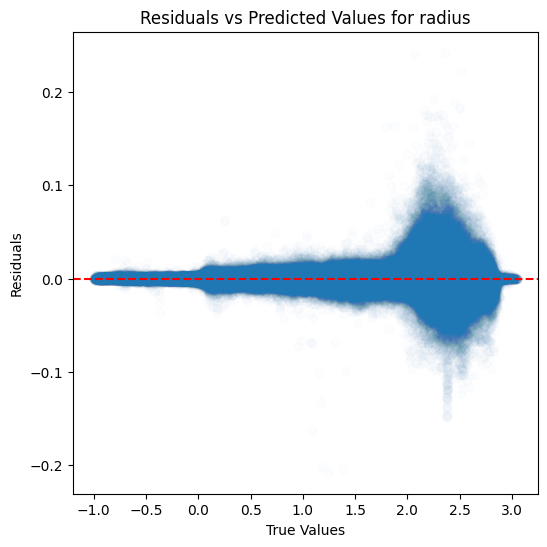

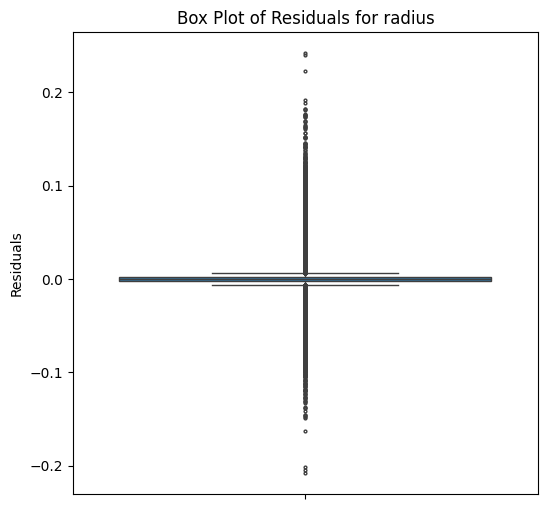

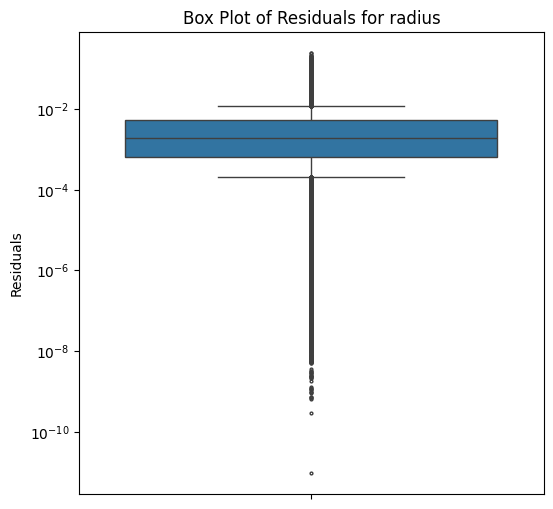

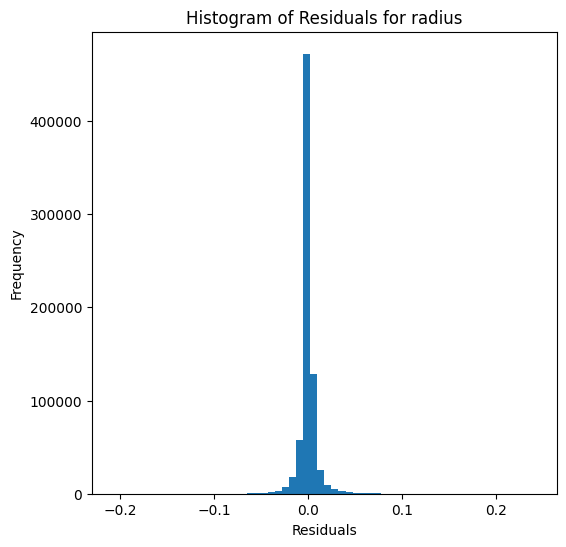

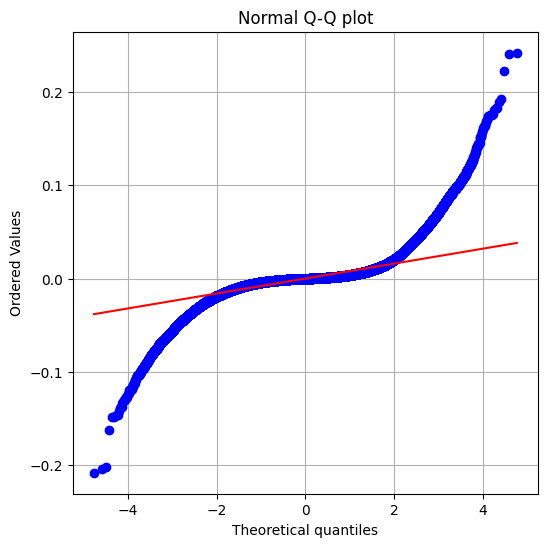

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9980152029679277
RMSE :  0.13405743195080502
MAE :  0.0825587047483107
MedAE :  0.047753927407173435
CORR :  0.9990071268934482
MAX_ER :  4.479203287905717
Percentiles : 
  75th percentile :  0.10941538867882361
  90th percentile :  0.20012842084273075
  95th percentile :  0.27419595340189806
  99th percentile :  0.4566027085540355



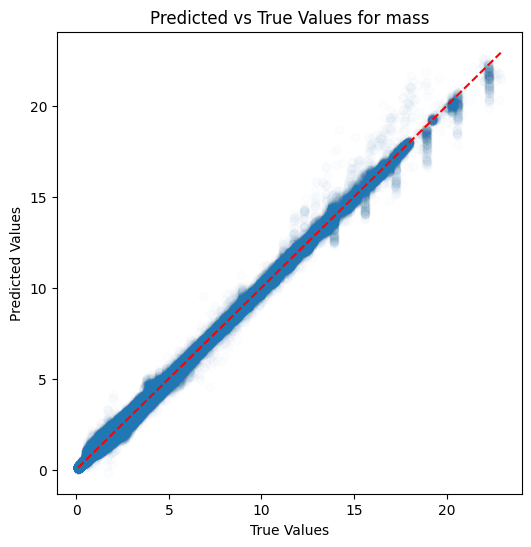

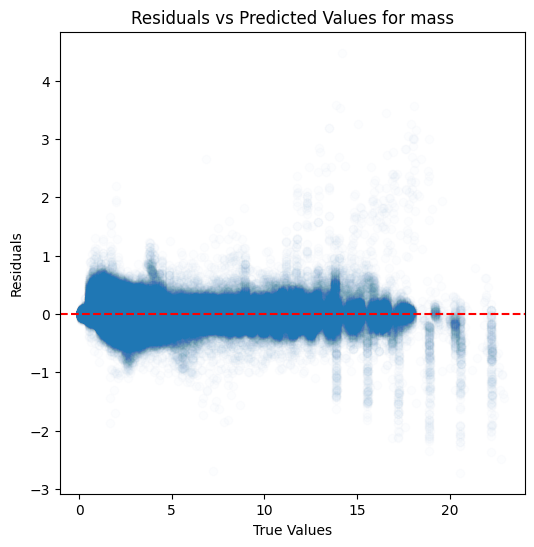

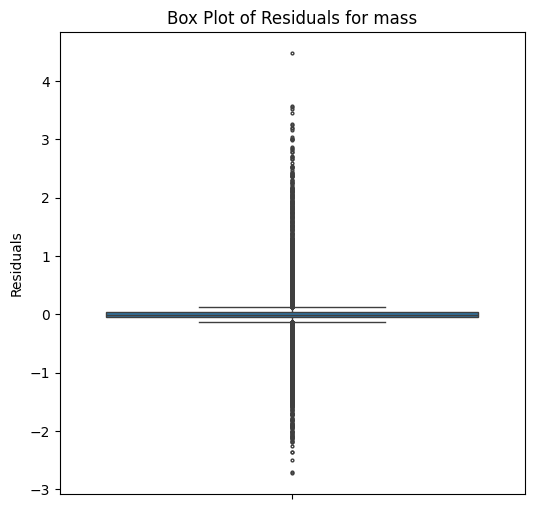

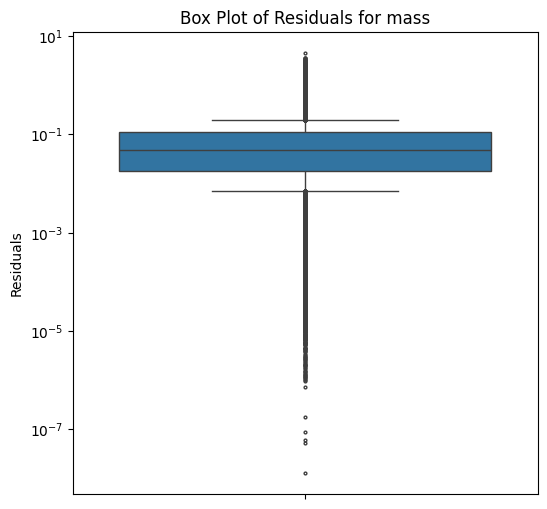

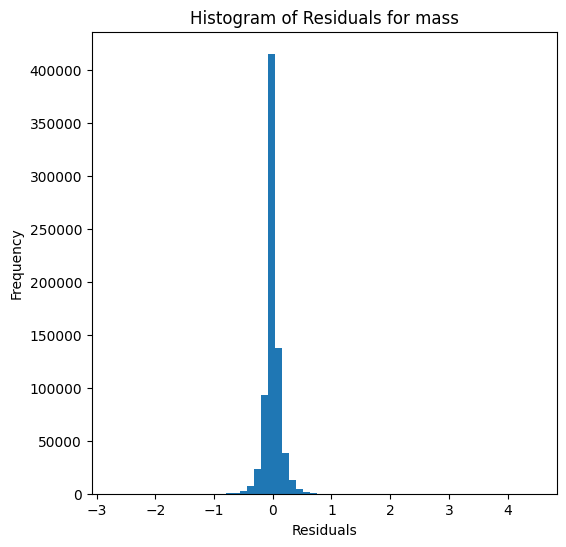

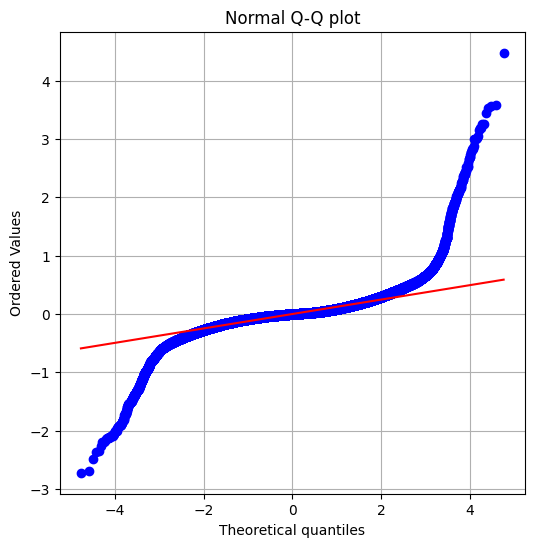


radius results:
RVE :  0.9996948617428804
RMSE :  0.01695161399679098
MAE :  0.012270329632807702
MedAE :  0.009213002978862406
CORR :  0.9998474199769891
MAX_ER :  0.17912328326214766
Percentiles : 
  75th percentile :  0.016518256681190426
  90th percentile :  0.026027986056471608
  95th percentile :  0.03400942623492176
  99th percentile :  0.05655457831932942



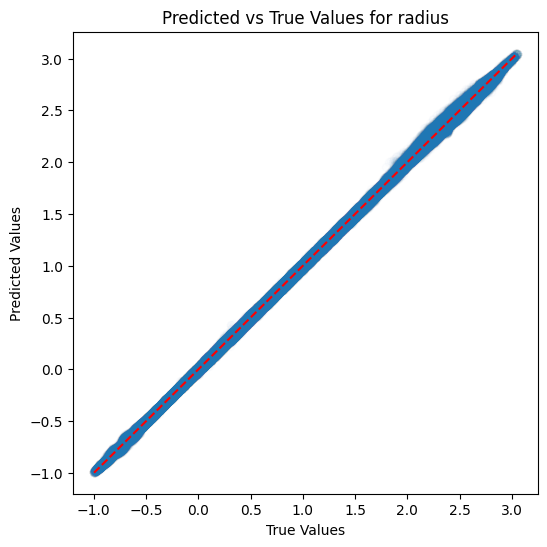

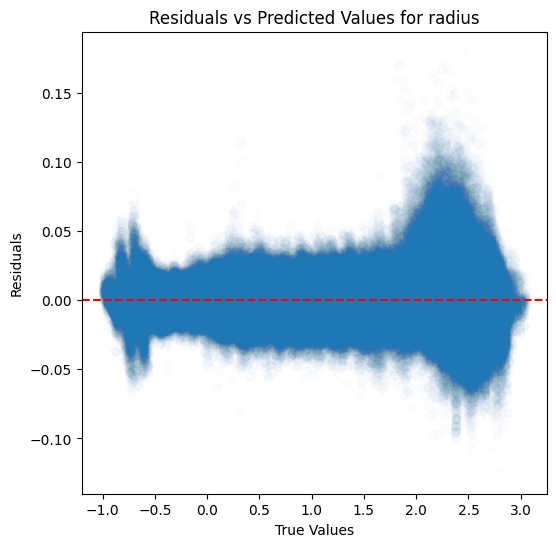

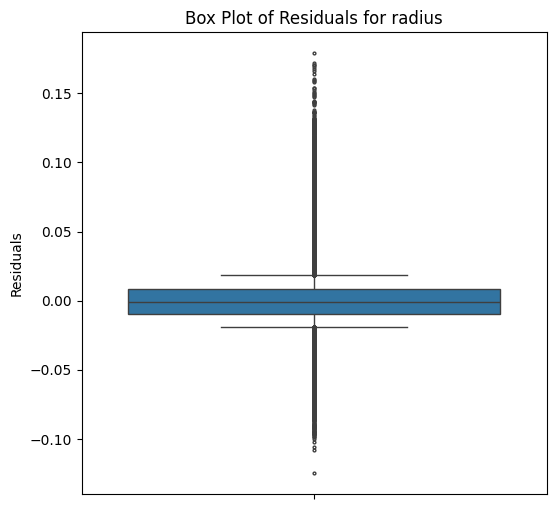

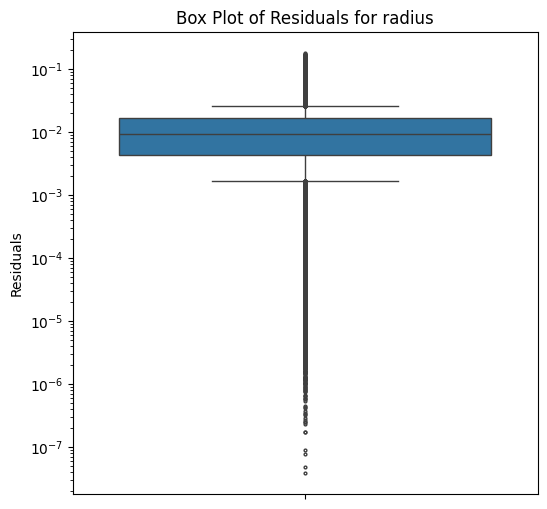

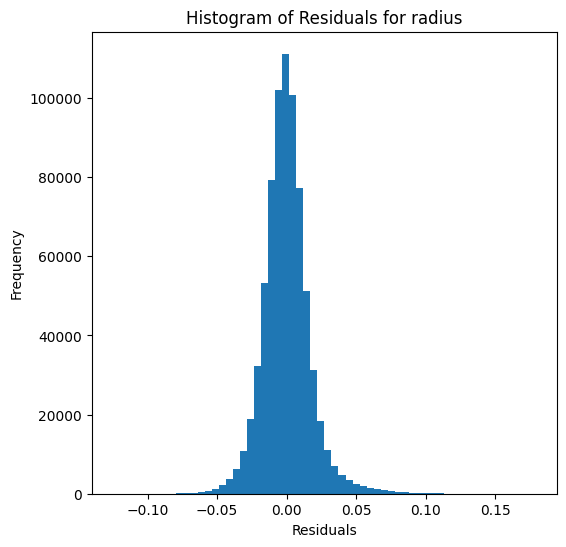

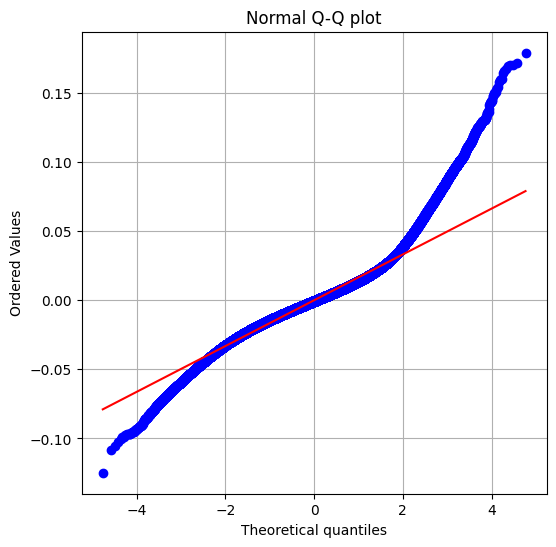

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [10]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.014367832950727796
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.012482476272980339
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.01242760895873021
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.013088886605680406
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.013020463772022409

mass results:
RVE :  0.9948624177048558
RMSE :  0.21694132796854967
MAE :  0.10297670416863523
MedAE :  0.057127346121245814
CORR :  0.9974625703920668
MAX_ER :  7.05939495329029
Percentiles : 
  75th percentile :  0.1230269845456613
  90th percentile :  0.23192454036754562
  95th percentile :  0.3268474746040835
  99th percentile :  0.593207723994136



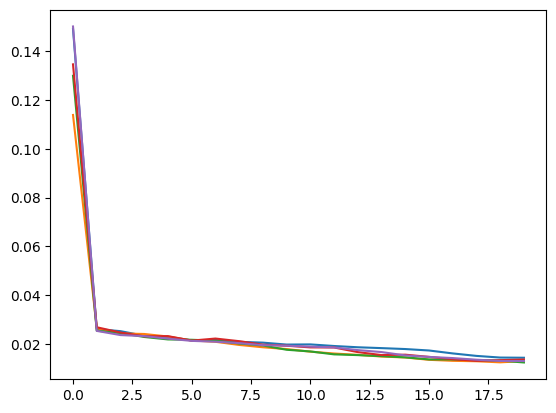

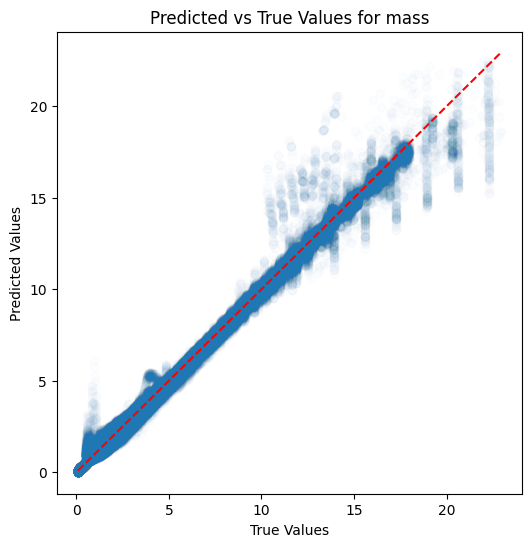

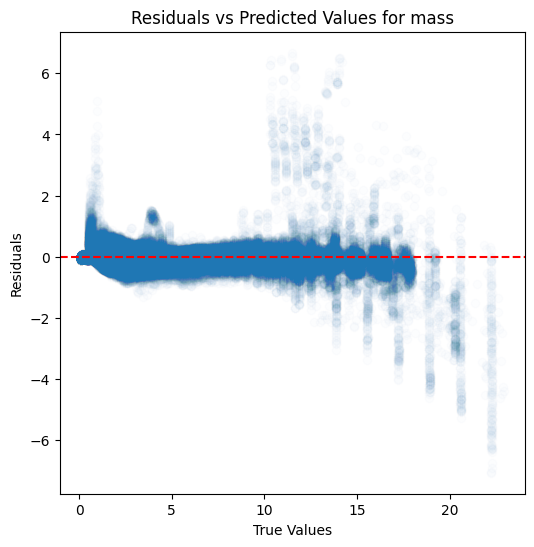

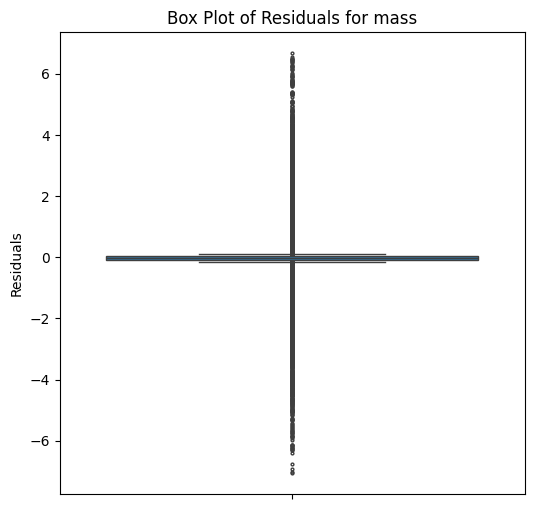

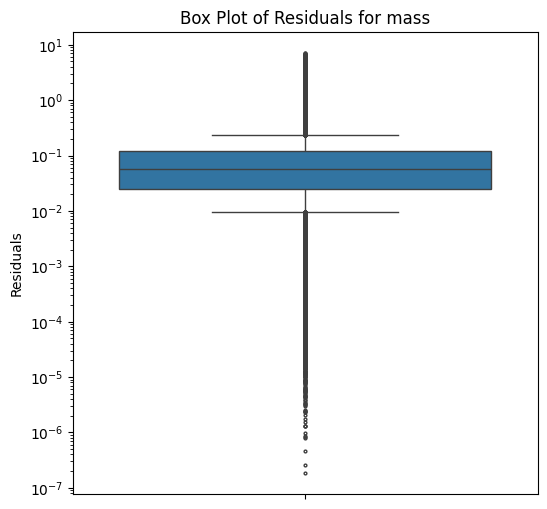

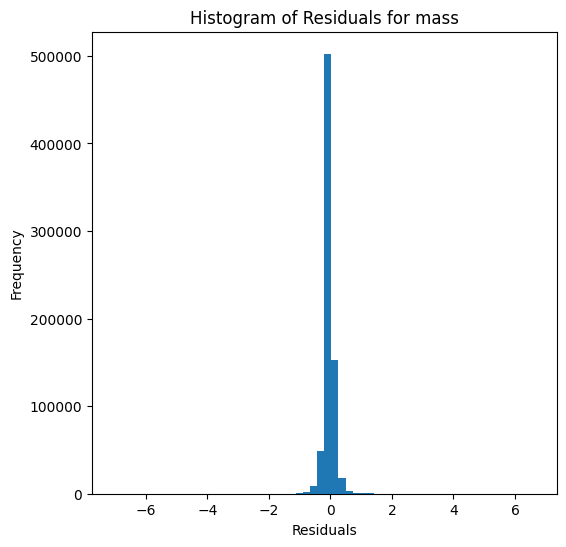

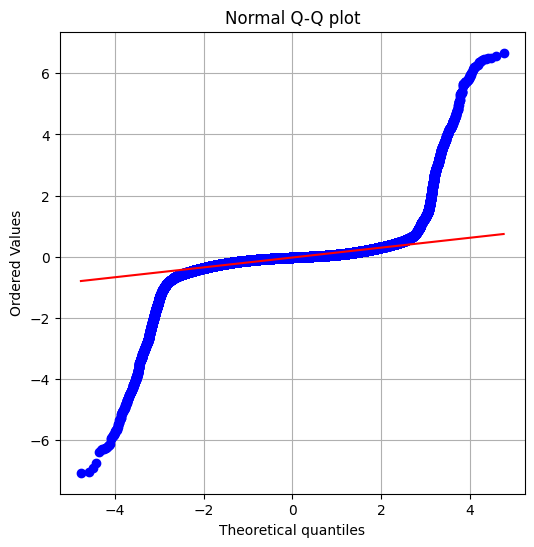


radius results:
RVE :  0.9983262937093501
RMSE :  0.04457586139813131
MAE :  0.03278976399642284
MedAE :  0.02293492906863337
CORR :  0.9991634509865515
MAX_ER :  0.4231271783581798
Percentiles : 
  75th percentile :  0.04627916139134092
  90th percentile :  0.07728223798027845
  95th percentile :  0.09303689152919625
  99th percentile :  0.13068996947784667



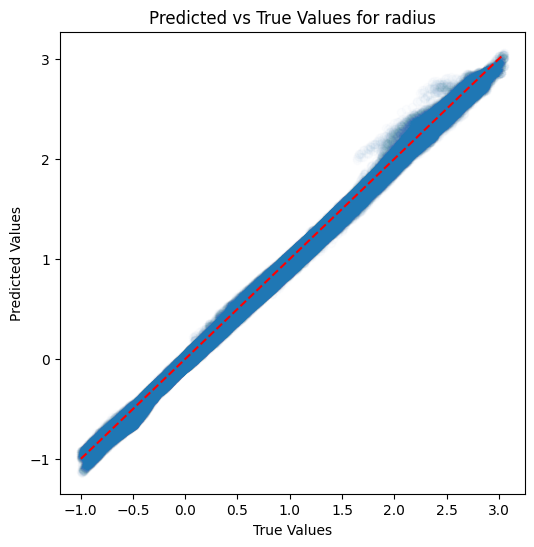

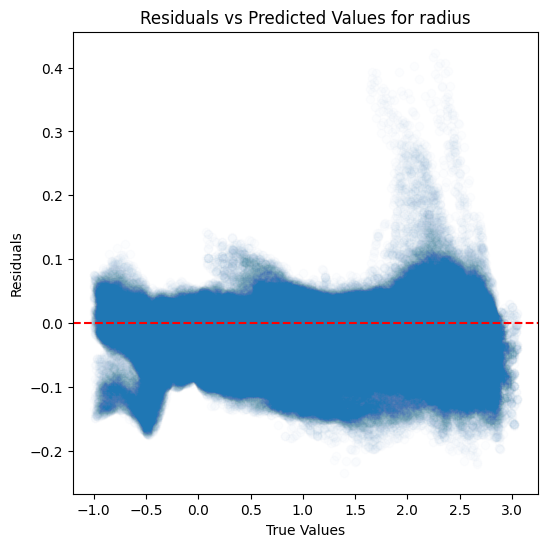

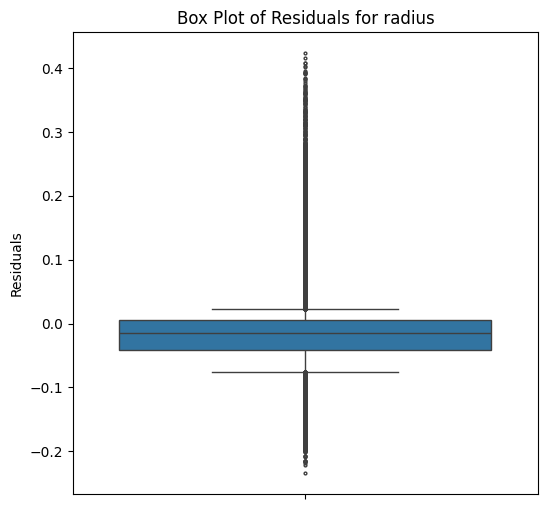

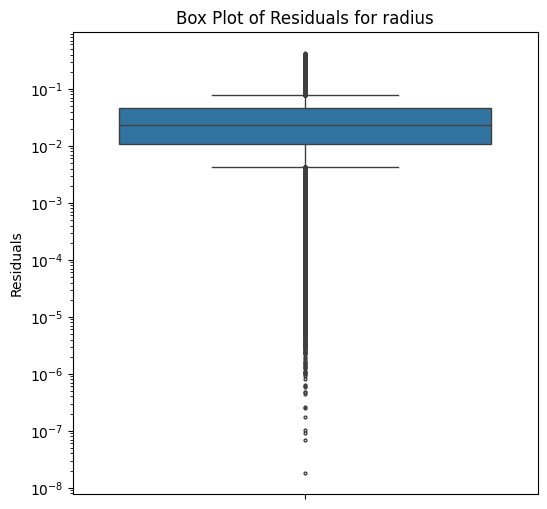

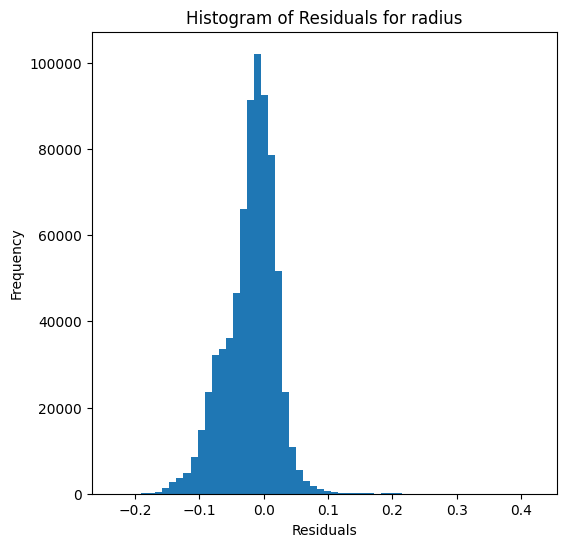

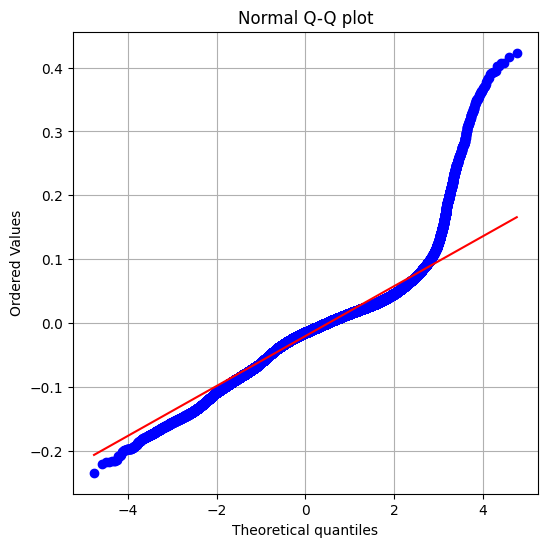

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)